In [13]:
import sys
sys.path.append("../sturdystats/")
from api import Index

import requests

api_key = "wowsa"
BASE = "https://sturdystatistics.com/api/text/v1/index"
NAME = "hacker_news_comments_v3"

def get(url, params):
    res = requests.get(BASE + url , params={"api_key": api_key, **params})
    return res

index = Index(API_key="wowsa", name="hacker_news_comments_v2")

def get_docs(params):
    return get(f"/{index.id}/doc", params)

def get_topic_diff(params):
    return get(f"/{index.id}/topic/diff", params)


Found an existing index with id="index_f1e380aa21aa4271b640cb82743af280".


In [14]:
import pandas as pd
from plotly import express as px

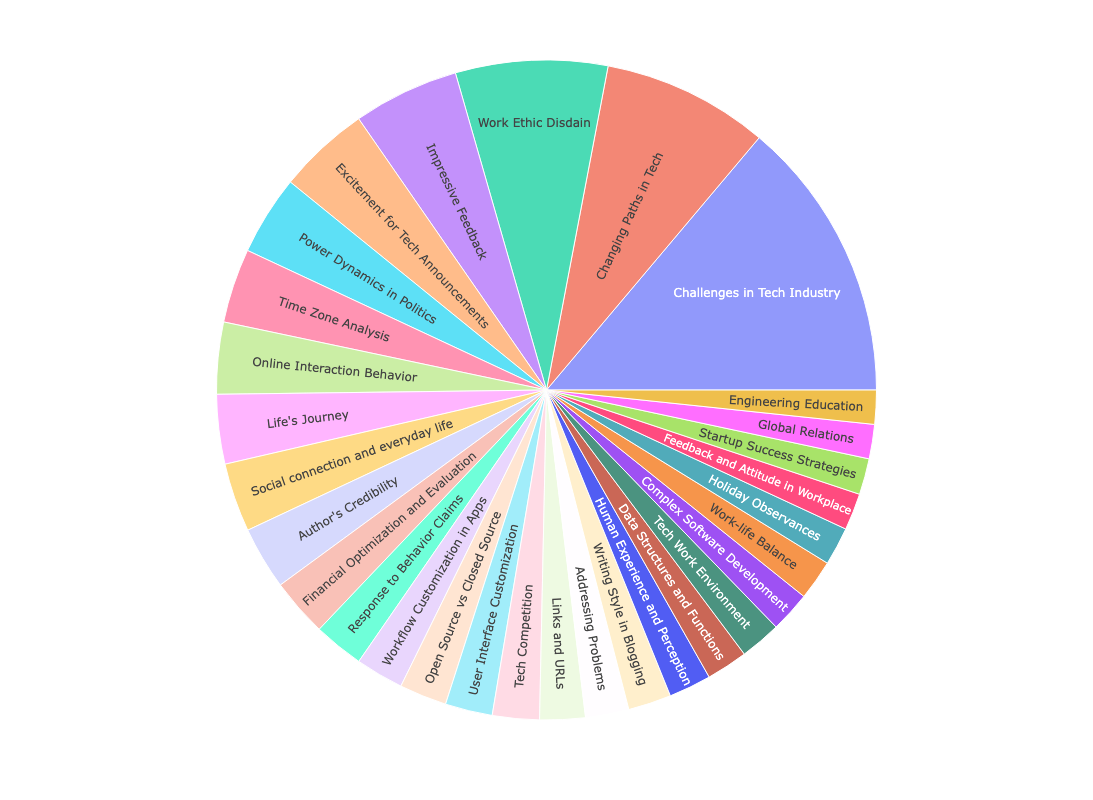

In [20]:
res = get_docs(dict(query="llama3 is awesome")).json()
docs, topics, topic_groups = res["docs"], res["topics"], res["topic_groups"]
topic_df = pd.DataFrame(topics).dropna()
topic_df.head()
fig = px.sunburst(topic_df.iloc[:30], path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"], )
fig.update_layout(width=800, height=800)
fig

In [21]:
for doc in docs[:5]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Link", doc["metadata"]["link"])
    print("Content:", doc["text"])
    print("")

Title: Llama.cpp 30B runs with only 6GB of RAM now
Published: 2023-03-31
Link https://news.ycombinator.com/item?id=35393284
Content: Author here. For additional context, please read <a href="https:&#x2F;&#x2F;github.com&#x2F;ggerganov&#x2F;llama.cpp&#x2F;discussions&#x2F;638#discussioncomment-5492916">https:&#x2F;&#x2F;github.com&#x2F;ggerganov&#x2F;llama.cpp&#x2F;discussions&#x2F;638#discu...</a> The loading time performance has been a huge win for usability, and folks have been having the most wonderful reactions after using this change. But we don&#x27;t have a compelling enough theory yet to explain the RAM usage miracle. So please don&#x27;t get too excited just yet! Yes things are getting more awesome, but like all things in science a small amount of healthy skepticism is warranted.

Title: Llama 2
Published: 2023-07-18
Link https://news.ycombinator.com/item?id=36774627
Content: Wow, Llama2 actually gives sources if you ask where information stems from.<p>&gt; <i>what&#x27;s the 